In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/banknotes.csv')

In [3]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [5]:
df.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
import seaborn as sns

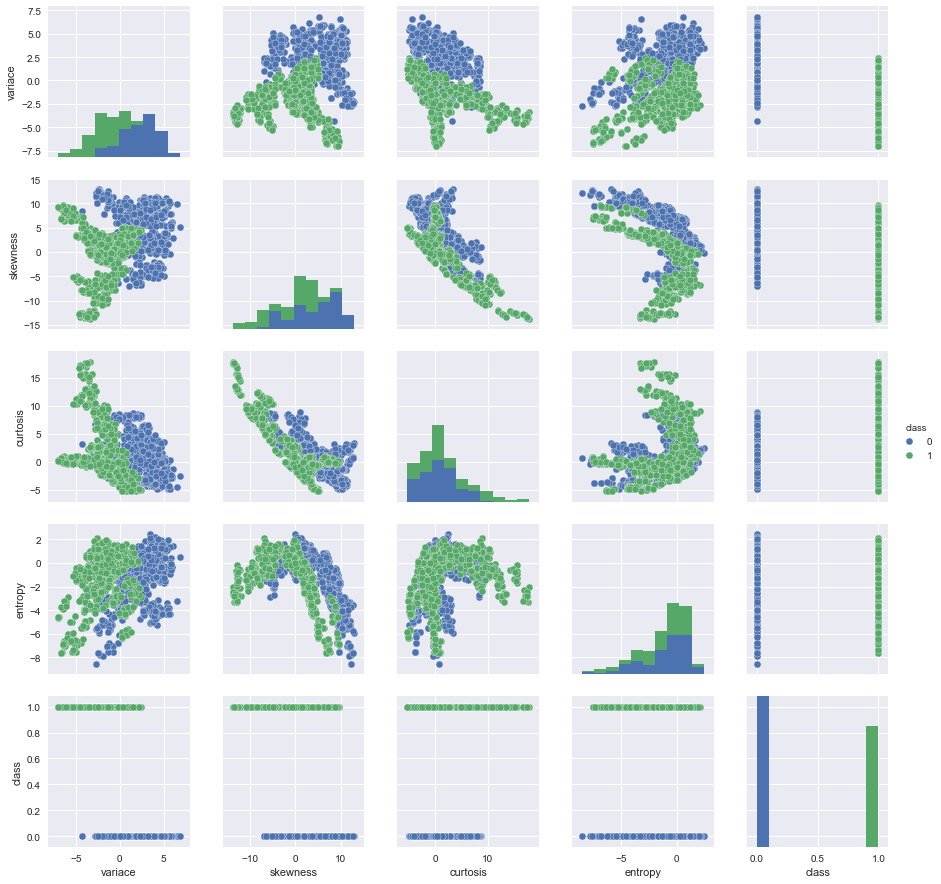

In [7]:
sns.pairplot(df, hue='class')

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [9]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [10]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.9868709 ,  0.99562363])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [26]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy'])
history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 1.1532 - acc: 0.2344     
Epoch 2/10
960/960 [==============================] - 0s - loss: 1.0348 - acc: 0.2792     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.9333 - acc: 0.3490     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.8468 - acc: 0.4052     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.7736 - acc: 0.4750     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.7116 - acc: 0.5396     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.6590 - acc: 0.5802     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.6144 - acc: 0.6208     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.5763 - acc: 0.6792     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [27]:
historydf = pd.DataFrame(history.history, index=history.epoch)

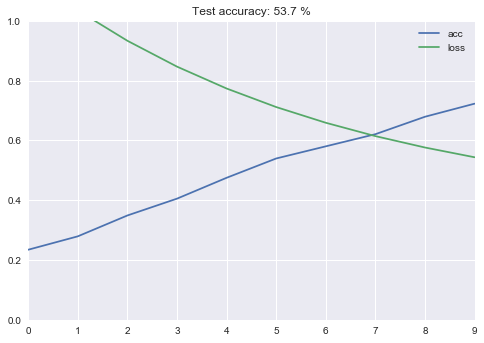

In [28]:
historydf.plot(ylim=(0,1))
plt.title('Test accuracy: {:3.1f} %'.format(result[0] * 100, fontsize=15))

In [33]:
dflist = []
learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=SGD(lr=lr), metrics=['accuracy'])
    history = model.fit(X_train, y_train, verbose=0, batch_size=16)
    result = model.evaluate(X_test, y_test)
    dflist.append(pd.DataFrame(history.history, index=history.epoch))

 32/412 [=>............................] - ETA: 0s

In [34]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns

In [35]:
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported])

In [36]:
historydf.columns = idx

KeyError: 'Level metric not found'

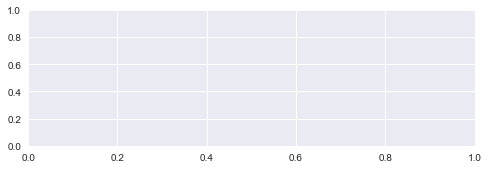

In [40]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, ).plot(ylim=(0,1), ax=ax)
plt.title('Loss')